In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
gold = pd.read_csv("https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/Gold%201968-present%20(cleaned).csv")
gold.shape

(13350, 2)

In [0]:
gold.describe()

,closing_price
count,13350.000000
mean,526.193945
std,434.811115
min,34.750000
25%,276.300000
50%,379.850000
75%,643.687500
max,1895.000000


In [0]:
(gold == 0).sum()

observation_date    0
closing_price       0
dtype: int64

In [0]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13350 entries, 0 to 13349
Data columns (total 2 columns):
observation_date    13350 non-null object
closing_price       13350 non-null float64
dtypes: float64(1), object(1)
memory usage: 208.7+ KB


In [0]:
gold.head(12)

,observation_date,closing_price
0,1968-04-01,37.70
1,1968-04-02,37.30
2,1968-04-03,37.60
3,1968-04-04,36.95
4,1968-04-05,37.00
5,1968-04-08,37.05
6,1968-04-09,37.50
7,1968-04-10,37.70
8,1968-04-11,38.00
9,1968-04-12,38.00


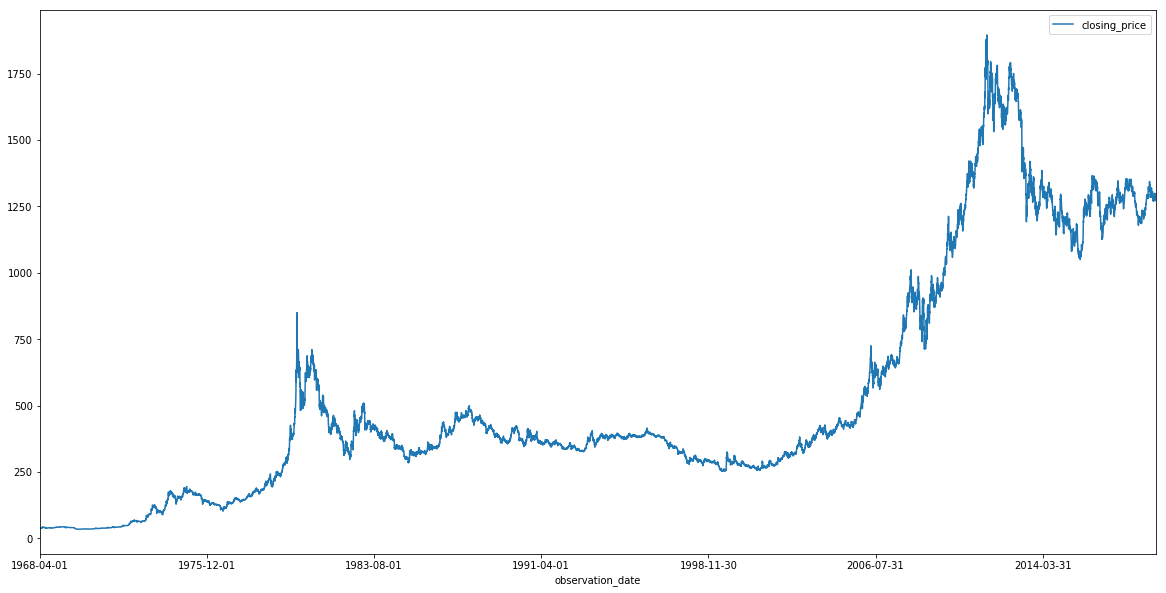

In [0]:
gold.plot(x="observation_date", y="closing_price", figsize=(20, 10));

In [0]:
quakes = pd.read_csv("https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/master/Earthquakes%205.5%201900-present.csv")
quakes.shape

(30251, 22)

In [0]:
quakes.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,30251.000000,30251.000000,29997.000000,30251.000000,7109.000000,8354.000000,2672.000000,18486.000000,2234.000000,5610.000000,1369.000000,3611.000000
mean,4.282117,37.327246,64.094516,5.951607,273.044732,44.853689,4.189849,1.018730,7.666862,5.078937,0.061660,47.232069
std,30.930651,125.660867,115.575820,0.471951,162.453989,35.404920,5.449785,0.360655,8.588187,20.749316,0.031673,62.862633
min,-77.080000,-179.997000,-4.000000,5.500000,0.000000,0.000000,0.004505,0.000000,0.085000,0.000000,0.000000,0.000000
25%,-17.616000,-79.147000,15.000000,5.600000,144.000000,24.000000,1.142500,0.900000,5.600000,1.800000,0.047000,14.000000
50%,-0.856000,100.063000,33.000000,5.800000,252.000000,35.900000,2.489500,1.000000,7.000000,3.100000,0.057000,30.000000
75%,32.038000,144.442000,47.000000,6.200000,381.000000,54.200000,4.895000,1.120000,8.300000,5.400000,0.068000,57.500000
max,86.922900,180.000000,700.000000,9.500000,934.000000,360.000000,37.874000,42.410000,99.000000,1312.300000,0.410000,941.000000


In [0]:
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 22 columns):
time               30251 non-null object
latitude           30251 non-null float64
longitude          30251 non-null float64
depth              29997 non-null float64
mag                30251 non-null float64
magType            30251 non-null object
nst                7109 non-null float64
gap                8354 non-null float64
dmin               2672 non-null float64
rms                18486 non-null float64
net                30251 non-null object
id                 30251 non-null object
updated            30251 non-null object
place              30248 non-null object
type               30251 non-null object
horizontalError    2234 non-null float64
depthError         5610 non-null float64
magError           1369 non-null float64
magNst             3611 non-null float64
status             30251 non-null object
locationSource     30251 non-null object
magSource          30251 

In [0]:
quakes.sample(12)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
6905,2005-10-08T03:57:19.830Z,34.2380,73.5790,10.00,5.9,mb,25.0,123.3,NaN,1.28,us,usp000e12f,2017-04-26T18:04:48.162Z,Pakistan,earthquake,NaN,NaN,NaN,7.0,reviewed,us,us
3421,2011-11-23T12:17:51.280Z,34.2850,25.0830,10.00,5.5,mwc,345.0,42.1,NaN,1.03,us,usp000jba2,2015-03-24T02:19:02.877Z,"Crete, Greece",earthquake,NaN,NaN,NaN,NaN,reviewed,us,gcmt
4762,2009-10-15T12:11:16.410Z,-3.0580,139.5390,105.70,6.0,mwc,172.0,19.8,NaN,0.79,us,usp000h30d,2016-11-10T02:19:02.869Z,"Papua, Indonesia",earthquake,NaN,6.3,NaN,NaN,reviewed,us,us
13505,1992-06-23T13:03:22.670Z,-17.9810,-174.7260,18.40,5.7,mw,NaN,NaN,NaN,1.00,us,usp00059hg,2016-11-09T22:49:38.215Z,Tonga,earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
279,2018-10-20T09:47:52.920Z,-6.5155,128.2714,358.83,5.6,mww,NaN,18.0,3.338,0.60,us,us1000hexe,2018-12-21T22:27:07.040Z,Banda Sea,earthquake,7.6,3.8,0.047,44.0,reviewed,us,us
8793,2002-01-19T09:06:16.620Z,43.9150,147.2720,55.30,5.7,mwb,437.0,NaN,NaN,0.75,us,usp000aws1,2016-11-09T21:42:08.766Z,Kuril Islands,earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
20173,1977-03-18T21:43:52.400Z,16.7730,122.3270,37.00,7.0,ms,NaN,NaN,NaN,NaN,us,usp0000myv,2017-04-26T17:30:33.547Z,"Luzon, Philippines",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us
26746,1957-03-16T02:34:18.000Z,51.4190,-178.8700,25.00,7.2,mw,NaN,NaN,NaN,NaN,iscgem,iscgem886172,2019-05-09T21:52:13.173Z,"Andreanof Islands, Aleutian Islands, Alaska",earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
27285,1954-10-21T00:10:15.000Z,-41.1240,80.1760,15.00,6.6,mw,NaN,NaN,NaN,NaN,iscgem,iscgem891179,2015-05-13T18:52:49.000Z,Mid-Indian Ridge,earthquake,NaN,NaN,NaN,NaN,automatic,iscgem,iscgem
21143,1974-11-15T23:32:42.100Z,35.7670,140.9910,36.00,5.8,mb,NaN,NaN,NaN,NaN,us,usp00008td,2015-05-13T18:53:10.000Z,"near the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us


In [0]:
pd.options.mode.chained_assignment = None  # default='warn'
df_quakes = quakes[['time', 'mag']]
df_quakes.time = df_quakes.time.str[:10]
df_quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 2 columns):
time    30251 non-null object
mag     30251 non-null float64
dtypes: float64(1), object(1)
memory usage: 472.8+ KB


In [0]:
df = df_quakes[df_quakes['time'] >= "1968-04-01"]
df = df[df['mag'] >= 6.7]
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 2 columns):
time    1448 non-null object
mag     1448 non-null float64
dtypes: float64(1), object(1)
memory usage: 22.7+ KB


In [0]:
df.sample(12)

,time,mag
880,1990-06-23,6.9
1300,1972-12-02,8.0
1305,1972-07-30,7.6
489,2003-10-08,6.7
1374,1970-05-31,7.9
570,2000-11-16,8.0
342,2008-09-29,7.0
949,1987-11-17,6.9
1304,1972-08-17,7.5
804,1993-01-15,7.6


In [0]:
#gold.reset_index(drop=True)

In [0]:
for _, row in df.iterrows():
  if gold[gold['observation_date'].equals(row.time)]:
    item = gold.loc[gold['observation_date'] == row.time]
    print(item)

KeyError: ignored

In [0]:
df1 = gold.set_index('observation_date')

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13350 entries, 1968-04-01 to 2019-05-31
Data columns (total 1 columns):
closing_price    13350 non-null float64
dtypes: float64(1)
memory usage: 208.6+ KB


In [0]:
df1.sample(12)

,closing_price
observation_date,
1999-08-31,254.80
1982-07-28,347.00
1990-12-10,374.05
1982-02-15,375.25
1998-01-05,284.40
1973-05-22,110.50
1983-01-11,484.50
1974-05-24,161.75
2001-06-21,271.70


In [0]:
type(df1.index)

pandas.core.indexes.base.Index

In [0]:
df1.index

Index(['1968-04-01', '1968-04-02', '1968-04-03', '1968-04-04', '1968-04-05',
       '1968-04-08', '1968-04-09', '1968-04-10', '1968-04-11', '1968-04-12',
       ...
       '2019-05-20', '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24',
       '2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30', '2019-05-31'],
      dtype='object', name='observation_date', length=13350)

In [0]:
import datetime
for _, row in df.iterrows():
  #print(row)
  t2 = pd.to_datetime(row.time).date() + datetime.timedelta(days=30)
  
  if row.time in df1.index:
    print(df1.loc[row.time].closing_price)
  else:
    t1 = pd.to_datetime(row.time).date() + datetime.timedelta(days=2)
    t2 = pd.to_datetime(row.time).date() + datetime.timedelta(days=30)
    print(df1.loc[t1.strftime('%Y-%m-%d')].closing_price, t1.strftime('%Y-%m-%d'), t2.strftime('%Y-%m-%d'))
    #print(t.strftime('%Y-%m-%d'))

1278.3 2019-05-28 2019-06-25
1298.4
1279.875
1294.3
1311.95
1329.05
1318.7
1282.1
1282.1 2019-01-22 2019-02-19
1292.2 2019-01-07 2019-02-04
1280.3 2018-12-31 2019-01-28
1259.75
1245.3
1235.9
1217.55
1223.0 2018-11-20 2018-12-18
1211.4
1230.8
1222.3
1229.95 2018-10-15 2018-11-12
1188.6
1204.7 2018-10-02 2018-10-30
1187.25
1196.6
1205.15
1204.2
1197.7
1190.95
1190.95 2018-08-21 2018-09-18
1190.95 2018-08-21 2018-09-18
1212.35 2018-08-07 2018-09-04
1309.4
1330.25
1323.85
1352.4
1321.0
1331.4
1325.75 2018-02-27 2018-03-27
1352.1
1333.4
1333.85 2018-01-16 2018-02-13
1319.75
1283.3 2017-11-21 2017-12-19
1274.6 2017-11-14 2017-12-12
1270.9 2017-11-06 2017-12-04
1270.15
1276.45
1291.4
1309.6
1346.25
1234.1
1250.8
1275.5
1274.95
1274.95
1220.4
1266.45
1269.4
1253.65
1216.8 2017-01-24 2017-02-21
1189.5
1151.0
1133.7875 2016-12-27 2017-01-24
1133.65
1136.25 2016-12-19 2017-01-16
1163.6
1171.05
1186.1
1214.25
1226.95 2016-11-15 2016-12-13
1254.8
1340.5 2016-09-26 2016-10-24
1309.5
1309.25
1318.45


In [0]:
df1.tail(15)

,closing_price
observation_date,
2019-05-13,1295.60
2019-05-14,1298.40
2019-05-15,1299.10
2019-05-16,1291.70
2019-05-17,1280.80
2019-05-20,1276.85
2019-05-21,1271.15
2019-05-22,1273.80
2019-05-23,1283.65


In [0]:
df.head(15)

,time,mag
0,2019-05-26,8.0
1,2019-05-14,7.5
2,2019-05-06,7.1
3,2019-04-12,6.8
4,2019-03-01,7.0
5,2019-02-22,7.5
6,2019-02-01,6.7
7,2019-01-22,6.7
8,2019-01-20,6.7
9,2019-01-05,6.8


In [0]:
gold.tail(30)

,observation_date,closing_price
13320,2019-04-22,1271.566667
13321,2019-04-23,1269.500000
13322,2019-04-24,1271.650000
13323,2019-04-25,1280.800000
13324,2019-04-26,1284.200000
13325,2019-04-29,1279.500000
13326,2019-04-30,1282.300000
13327,2019-05-01,1283.800000
13328,2019-05-02,1270.950000
13329,2019-05-03,1278.550000
